In [1]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from colormap import rgb2hex
from kneed import KneeLocator

import numpy as np

# Data generation

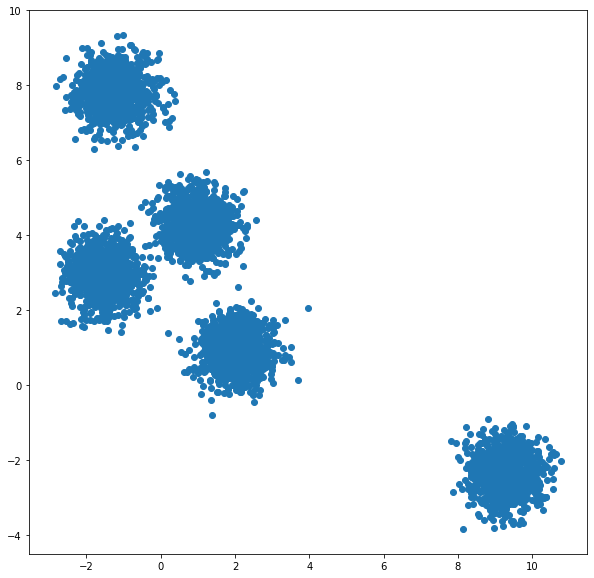

In [2]:
X, y = make_blobs(n_samples=5000, centers=5, cluster_std=0.5, random_state=0)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1])
plt.show()

# DBSCAN

[-1, 0, 1, 2, 3, 4]


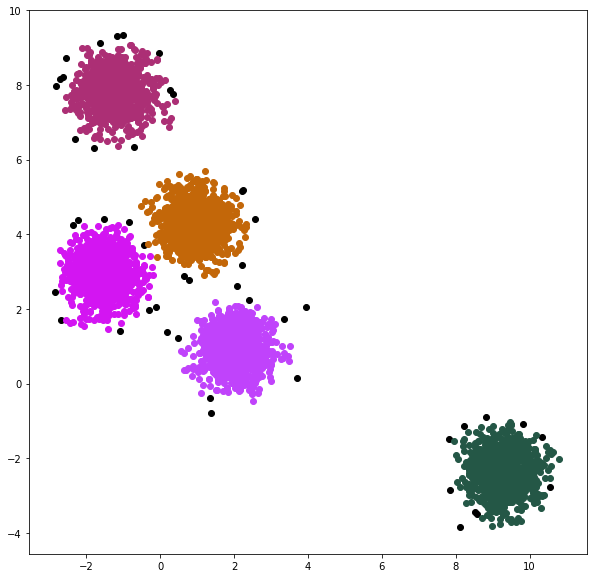

In [3]:
db = DBSCAN(eps=0.25).fit(X)
labels = db.labels_
unique = sorted(set(labels))

print(unique)

np.random.seed(0)
colors = [[0,0,0]] + [(np.random.choice(range(256), size=3)).tolist() for i in range(len(unique))]

plt.figure(figsize=(10,10))
for idx, (cluster, col) in enumerate(zip(unique,colors)):
    res = X[labels==cluster]
    plt.scatter(res[:,0], res[:,1], c=rgb2hex(*col))

# KMeans - elbow and silhouette methods

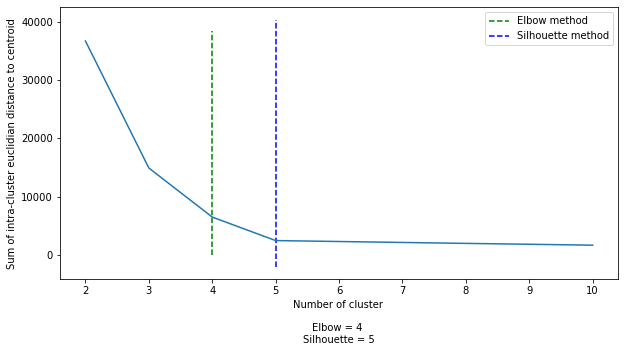

In [4]:
inertias, sil = [], []
cluster_no = [2,3,4,5,6,7,8,9,10]

for cls in cluster_no:
    kmeans = KMeans(n_clusters = cls, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)
    sil.append(silhouette_score(X, kmeans.labels_))

kn = KneeLocator(cluster_no, inertias, curve='convex', direction='decreasing')

plt.figure(figsize=(10,5))
plt.plot(cluster_no, inertias)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyle='dashed',colors='green', label='Elbow method')
plt.vlines(cluster_no[np.argmax(sil)], plt.ylim()[0], plt.ylim()[1], linestyle='dashed',colors='blue', label='Silhouette method')
plt.xlabel('Number of cluster \n\nElbow = %s \nSilhouette = %s'%(kn.knee, cluster_no[np.argmax(sil)]))
plt.ylabel('Sum of intra-cluster euclidian distance to centroid')
plt.legend()

plt.show()

## Comparison with best cluster value per method

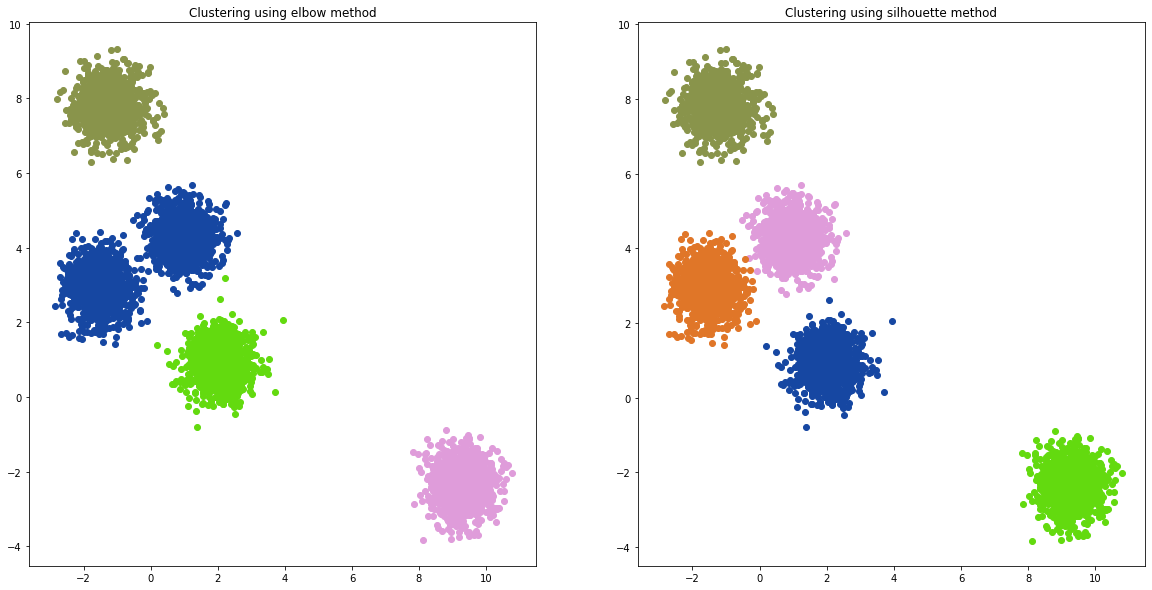

In [5]:
kmeans = KMeans(n_clusters = kn.knee, random_state=0).fit(X)
labels = kmeans.labels_
unique = sorted(set(labels))

np.random.seed(20)
colors = [(np.random.choice(range(256), size=3)).tolist() for i in range(len(unique))]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
for idx, (cluster, col) in enumerate(zip(unique, colors)):
    res = X[labels==cluster]
    plt.scatter(res[:,0], res[:,1], c=rgb2hex(*col))
plt.title('Clustering using elbow method')

kmeans = KMeans(n_clusters = cluster_no[np.argmax(sil)], random_state=0).fit(X)
labels = kmeans.labels_
unique = sorted(set(labels))

np.random.seed(20)
colors = [(np.random.choice(range(256), size=3)).tolist() for i in range(len(unique))]
plt.subplot(1,2,2)
for idx, (cluster, col) in enumerate(zip(unique, colors)):
    res = X[labels==cluster]
    plt.scatter(res[:,0], res[:,1], c=rgb2hex(*col))
plt.title('Clustering using silhouette method')

plt.show()